# Name: Abia Javed, Israa Batool

# Roll No: 21I-0311, 21I-0344

# Assignment No. 2

# Classifying malicious types from URLs

In [1]:
# dataset is classified into five categories benign, defacement, phishing, malware, spams
import pandas as pd

In [2]:
#read the main dataset
import pandas as pd
main_file = pd.read_csv(r"/kaggle/input/dataset/malicious_phish.csv")
main_file

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


# Data Merging

In [3]:
file_paths = [
    (r"/kaggle/input/assignment02/Benign_list_big_final.csv", "benign"),
    (r"/kaggle/input/assignment02/DefacementSitesURLFiltered.csv", "defacement"),
    (r"/kaggle/input/assignment02/Malware_dataset.csv", "malware"),
    (r"/kaggle/input/assignment02/phishing_dataset.csv", "phishing"),
    (r"/kaggle/input/assignment02/spam_dataset.csv", "spams")
]


# Initialize an empty list to store dataframes
dfs = []

# Iterate through the file paths and types
for file_path, url_type in file_paths:
    # Read the CSV file
    df = pd.read_csv(file_path, header=None)
    # Assign column names
    df.columns = ["url"]
    # Add a column for the URL type
    df["type"] = url_type
    # Append the dataframe to the list
    dfs.append(df)

dfs.append(main_file)
# Concatenate the list of dataframes into a single dataframe
merged_df = pd.concat(dfs, ignore_index=True)
merged_df.drop_duplicates(inplace=True)
merged_df.reset_index(drop=True, inplace=True)
merged_df.head(100000)

,url,type
0,http://1337x.to/torrent/1048648/American-Snipe...,benign
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,benign
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,benign
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,benign
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,benign
...,...,...
99995,http://www.ccent.com.au/index.php?view=article...,defacement
99996,http://www.ccent.com.au/index.php?option=com_c...,defacement
99997,http://www.ccent.com.au/index.php?option=com_m...,defacement
99998,http://www.ccent.com.au/index.php?view=article...,defacement


In [4]:
merged_df

,url,type
0,http://1337x.to/torrent/1048648/American-Snipe...,benign
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,benign
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,benign
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,benign
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,benign
...,...,...
653041,xbox360.ign.com/objects/850/850402.html,phishing
653042,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
653043,www.gamespot.com/xbox360/action/deadspace/,phishing
653044,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


# Preprocessing

In [5]:
import pandas as pd
import numpy as np
print("Missing values before cleaning:\n", merged_df.isnull().sum())
merged_df.fillna("unknown", inplace=True)
merged_df.drop_duplicates(inplace=True)
merged_df.reset_index(drop=True, inplace=True)
print("\nMissing values after cleaning:\n", merged_df.isnull().sum())


Missing values before cleaning:
 url     0
type    0
dtype: int64

Missing values after cleaning:
 url     0
type    0
dtype: int64


In [6]:
#encode categorical variables
from sklearn.preprocessing import LabelEncoder

# Encode the 'type' column
le = LabelEncoder()
merged_df['type_encoded'] = le.fit_transform(merged_df['type'])
merged_df

,url,type,type_encoded
0,http://1337x.to/torrent/1048648/American-Snipe...,benign,0
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,benign,0
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,benign,0
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,benign,0
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,benign,0
...,...,...,...
653041,xbox360.ign.com/objects/850/850402.html,phishing,3
653042,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,3
653043,www.gamespot.com/xbox360/action/deadspace/,phishing,3
653044,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,3


# Balancing the dataset

In [7]:

!pip install scikit-learn

In [8]:
!pip install --upgrade scikit-learn imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 104.9 MB/s eta 0:00:0000:01:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
bigframes 1.36.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.


In [9]:
merged_df

,url,type,type_encoded
0,http://1337x.to/torrent/1048648/American-Snipe...,benign,0
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,benign,0
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,benign,0
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,benign,0
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,benign,0
...,...,...,...
653041,xbox360.ign.com/objects/850/850402.html,phishing,3
653042,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,3
653043,www.gamespot.com/xbox360/action/deadspace/,phishing,3
653044,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,3


In [10]:
!pip install scikit-learn==1.3.2 imbalanced-learn==0.11.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 90.5 MB/s eta 0:00:00:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 5.5 MB/s eta 0:00:0000:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nilearn 0.11.1 requires scikit-learn>=1.4.0, but you have scikit-learn 1.3.2 which is incompatible.
bigframes 1.36.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.


In [11]:

!pip install -U scikit-learn==1.2.1 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 12.1 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nilearn 0.11.1 requires scikit-learn>=1.4.0, but you have scikit-learn 1.2.1 which is incompatible.
bigframes 1.36.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.
bigframes 1.36.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.2.1 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.1 which is incompatible.


In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import resample


main_file = pd.read_csv("/kaggle/input/dataset/malicious_phish.csv")
file_paths = [
    ("/kaggle/input/assignment02/Benign_list_big_final.csv", "benign"),
    ("/kaggle/input/assignment02/DefacementSitesURLFiltered.csv", "defacement"),
    ("/kaggle/input/assignment02/Malware_dataset.csv", "malware"),
    ("/kaggle/input/assignment02/phishing_dataset.csv", "phishing"),
    ("/kaggle/input/assignment02/spam_dataset.csv", "spams")
]

dfs = []

for file_path, label in file_paths:
    df = pd.read_csv(file_path, header=None)
    df.columns = ['url']
    df['type'] = label
    dfs.append(df)


dfs.append(main_file)
merged_df = pd.concat(dfs, ignore_index=True)
merged_df.drop_duplicates(inplace=True)
merged_df.dropna(inplace=True)
merged_df.reset_index(drop=True, inplace=True)


le = LabelEncoder()
merged_df['type_encoded'] = le.fit_transform(merged_df['type'])


vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(merged_df['url'])
y = merged_df['type']

# Convert sparse matrix to DataFrame 
df_X = pd.DataFrame.sparse.from_spmatrix(X, columns=vectorizer.get_feature_names_out())
df_X['type'] = y.values

# Balance all classes to have same number of samples
min_samples = df_X['type'].value_counts().min()

balanced_dfs = []
for label in df_X['type'].unique():
    df_label = df_X[df_X['type'] == label]
    df_resampled = resample(
        df_label,
        replace=True,
        n_samples=min_samples,
        random_state=42
    )
    balanced_dfs.append(df_resampled)


balanced_df = pd.concat(balanced_dfs).sample(frac=1, random_state=42).reset_index(drop=True)
balanced_df.to_csv('/kaggle/working/balanced_df.csv', index=False)

print("Balanced dataset saved as 'balanced_df.csv'")
print("\nBalanced class distribution:\n", balanced_df['type'].value_counts())
print("\nSample of balanced data:\n")
print(balanced_df.head())


Balanced dataset saved as 'balanced_df.csv'

Balanced class distribution:
 type
malware       11921
phishing      11921
benign        11921
defacement    11921
spams         11921
Name: count, dtype: int64

Sample of balanced data:

   000webhostapp  01  02  03  04  05  06  07  08  09  ...  yellowpages  yelp  \
0              0   0   0   0   0   0   0   0   0   0  ...            0     0   
1              0   0   0   0   0   0   0   0   0   0  ...            0     0   
2              0   0   0   0   0   0   0   0   0   0  ...            0     0   
3              0   0   0   0   0   0   0   0   0   0  ...            0     0   
4              0   0   0   0   0   0   0   0   0   0  ...            0     0   

   york  yorkpress  you  your  youtube  za  zip  zoominfo  
0     0          0    0     0        0   0    0         0  
1     0          0    0     0        0   0    0         0  
2     0          0    0     0        0   0    0         0  
3     0          0    0     0        0   0    

In [13]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Ordinal Encoding 
encoder = OrdinalEncoder()
X_ord = encoder.fit_transform(merged_df[['url']])  

# Feature Engineering
merged_df['url_length'] = merged_df['url'].str.len()
merged_df['num_special_chars'] = merged_df['url'].str.count(r'[^\w\s]')

X_features = merged_df[['url_length', 'num_special_chars']]

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(merged_df['url']).tocsr()

print("TF-IDF matrix shape:", X_tfidf.shape)

# Combine TF-IDF with engineered features
from scipy.sparse import hstack
from sklearn.preprocessing import StandardScaler

# Scale the additional features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

# Combine TF-IDF (sparse) and scaled features (dense converted to sparse)
X_final = hstack([X_tfidf, X_scaled], format='csr')

print("Final combined feature matrix shape:", X_final.shape)


TF-IDF matrix shape: (653046, 1000)
Final combined feature matrix shape: (653046, 1002)


# EDA

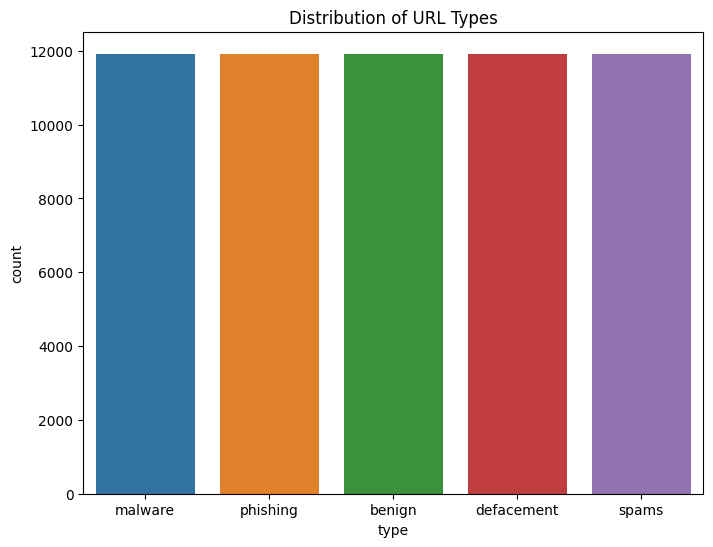

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of types
plt.figure(figsize=(8,6))
sns.countplot(x='type', data=balanced_df)
plt.title('Distribution of URL Types')
plt.show()


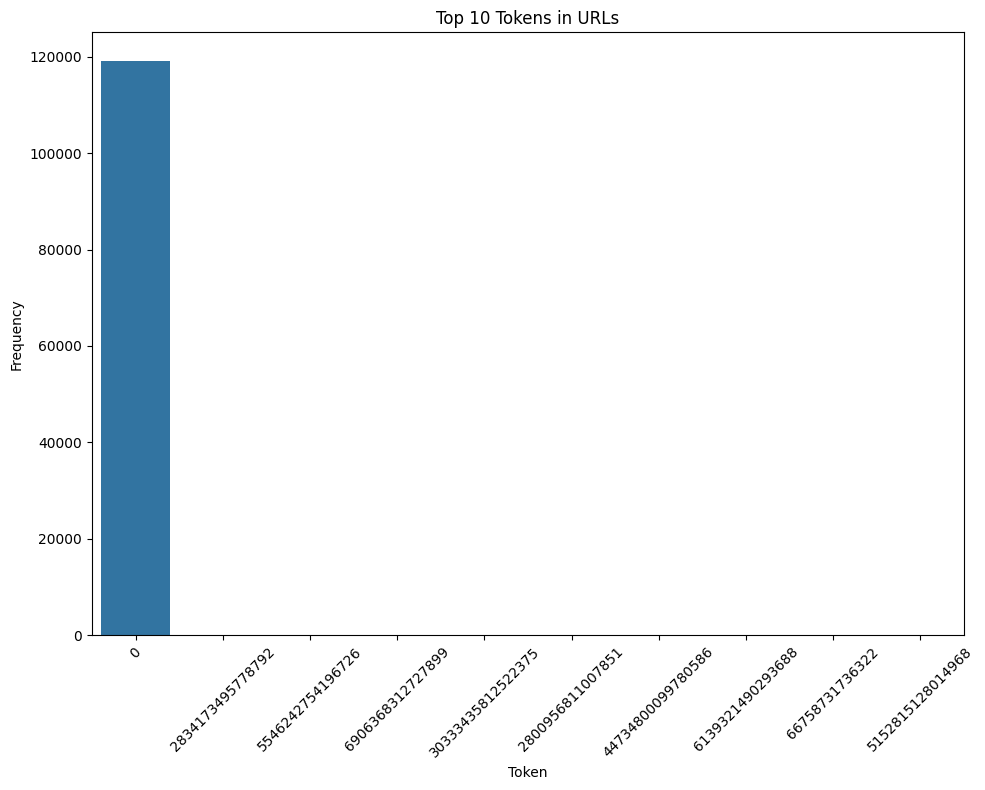

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re



# Tokenize URLs and explore patterns
def tokenize_url(url):
    # Ensure url is a string
    url = str(url)
    # Simple tokenization using regex to split based on '/', '.', and '-'
    tokens = re.split(r'[/.-]', url)
    return tokens

# Apply tokenization to the 'url' column
balanced_df['tokens'] = balanced_df['url'].apply(tokenize_url)
token_counts = balanced_df['tokens'].explode().value_counts()

# there might be no tokens to plot
top_tokens = token_counts.head(10) if len(token_counts) > 0 else pd.Series()

# Check if there are tokens to display
if not top_tokens.empty:
    plt.figure(figsize=(10,8))
    sns.barplot(x=top_tokens.index, y=top_tokens.values)
    plt.title('Top 10 Tokens in URLs')
    plt.xticks(rotation=45)
    plt.xlabel('Token')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
else:
    print("No tokens to display.")


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


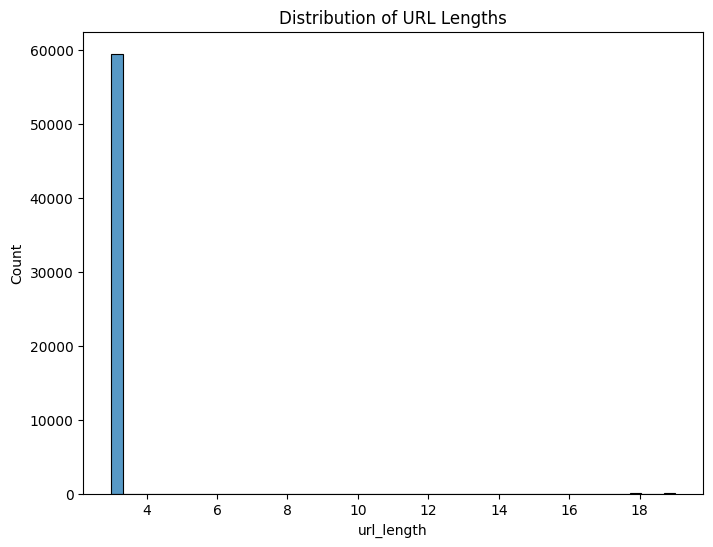

In [18]:
# url length distribution
balanced_df['url_length'] = balanced_df['url'].apply(len)
plt.figure(figsize=(8,6))
sns.histplot(balanced_df['url_length'], bins=50)
plt.title('Distribution of URL Lengths')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


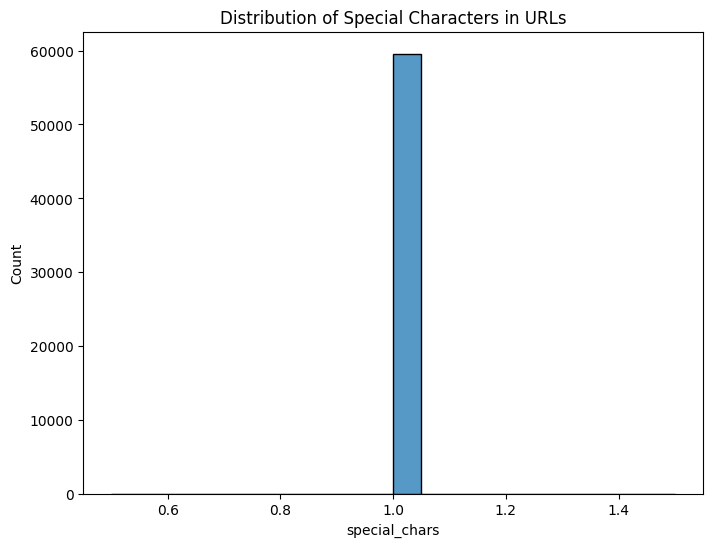

In [19]:
# special characters in url
def count_special_chars(url):
    return sum(not c.isalnum() for c in url)

balanced_df['special_chars'] = balanced_df['url'].apply(count_special_chars)
plt.figure(figsize=(8,6))
sns.histplot(balanced_df['special_chars'], bins=20)
plt.title('Distribution of Special Characters in URLs')
plt.show()


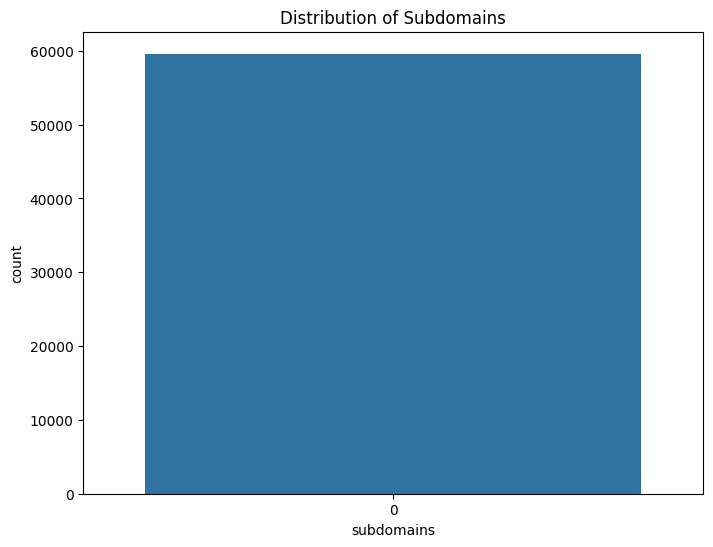

In [20]:
# subdomain count
def count_subdomains(url):
    return len(url.split('.')) - 2

balanced_df['subdomains'] = balanced_df['url'].apply(count_subdomains)
plt.figure(figsize=(8,6))
sns.countplot(x='subdomains', data=balanced_df)
plt.title('Distribution of Subdomains')
plt.show()


In [21]:
#token frequency by type
token_freq_by_type = balanced_df.groupby('type_encoded')['tokens'].apply(lambda x: pd.Series([item for sublist in x for item in sublist]).value_counts().head(5))
print(token_freq_by_type)


type_encoded                   
0             0                    23808
              6906368312727899         3
              44734800099780586        2
              697386185720526          1
              4932034049176137         1
1             0                    23840
              5558369367286934         1
              39731363304116546        1
2             0                    23824
              6111229358862311         2
              5152815128014968         2
              6139321490293688         2
              6271427598614578         1
3             0                    23828
              66758731736322           2
              4044955372632106         1
              6493176470315929         1
              7553396489704588         1
4             0                    23818
              5546242754196726         4
              2834173495778792         4
              2800956811007851         3
              30333435812522375        3
Name: tokens, dtype: int6

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


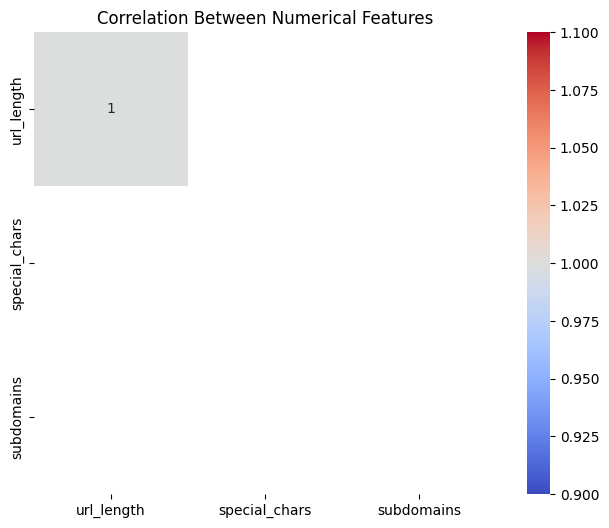

In [22]:
# heatmap of correlation between features
numerical_features = balanced_df[['url_length', 'special_chars', 'subdomains']]
corr_matrix = numerical_features.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Between Numerical Features')
plt.show()


# Feature Extraction

In [23]:
#NLP based embeddings
from sklearn.feature_extraction.text import TfidfVectorizer

# Apply TF-IDF to URLs
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(balanced_df['url'])


In [24]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Create a mapping of characters to integer indices
def create_char_index(urls):
    chars = set(''.join(urls))  # Extract unique characters from all URLs
    char_to_index = {char: idx+1 for idx, char in enumerate(chars)}  # Map characters to indices (1-based)
    return char_to_index

# Tokenize URLs into sequences of integers (using the char-to-index mapping)
def tokenize_url_chars_to_int(url, char_to_index):
    return [char_to_index.get(char, 0) for char in url]  # Default to 0 for unknown chars

# Create the character index mapping
char_to_index = create_char_index(balanced_df['url'])

# Convert URLs to integer sequences
tokenized_urls_int = balanced_df['url'].apply(lambda url: tokenize_url_chars_to_int(url, char_to_index))

# Pad the sequences to the same length
max_length = 200  # You can adjust this based on your dataset
padded_urls = pad_sequences(tokenized_urls_int, maxlen=max_length, padding='post')

print(padded_urls.shape)


2025-04-15 06:34:30.269285: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744698870.466848      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744698870.522816      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


(59605, 200)


# ML Models

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Encode string labels into numbers
le = LabelEncoder()
y_encoded = le.fit_transform(balanced_df['type'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)

# Train models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name}: Accuracy = {accuracy_score(y_test, y_pred):.3f}")


Random Forest: Accuracy = 0.197
SVM: Accuracy = 0.197
XGBoost: Accuracy = 0.197


# DeepLearning Models

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Tokenize the text data (e.g., URLs)
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(balanced_df['url'])  # Replace 'url' with your column name

# Convert URLs to sequences of integers
sequences = tokenizer.texts_to_sequences(balanced_df['url'])

# Pad sequences to have equal length
padded_urls = pad_sequences(sequences, padding='post')
# Get the maximum length of any sequence
max_length = max([len(seq) for seq in sequences])



# Encode labels
le = LabelEncoder()
encoded_labels = le.fit_transform(balanced_df['type'])  # This replaces strings with ints

# For LSTM, use the padded sequences
X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(padded_urls,encoded_labels, test_size=0.2, random_state=42)

# Define LSTM model
model_lstm = Sequential([
    Embedding(input_dim=1000, output_dim=128, input_length=max_length),
    LSTM(64),
    Dense(len(le.classes_), activation='softmax')
])

model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_lstm.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, validation_data=(X_test_seq, y_test_seq))


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
I0000 00:00:1744668799.647085     157 cuda_dnn.cc:529] Loaded cuDNN version 90300


1491/1491 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.2026 - loss: 1.6102 - val_accuracy: 0.1968 - val_loss: 1.6097
Epoch 2/10
1491/1491 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2000 - loss: 1.6097 - val_accuracy: 0.2041 - val_loss: 1.6094
Epoch 3/10
1491/1491 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2033 - loss: 1.6095 - val_accuracy: 0.2019 - val_loss: 1.6091
Epoch 4/10
1491/1491 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1981 - loss: 1.6092 - val_accuracy: 0.2018 - val_loss: 1.6086
Epoch 5/10
1491/1491 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2060 - loss: 1.6077 - val_accuracy: 0.1986 - val_loss: 1.6086
Epoch 6/10
1491/1491 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1998 - loss: 1.6078 - val_accuracy: 0.2007 - val_loss: 1.6084
Epoch 7/10
1491/1491 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1997 - loss: 1.6079 - val_accuracy: 0.1987 - val_loss: 1.6083
Epoch 8/10
1491/1491 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1963 - loss: 1.6071 - val_accurac

# LLM Based Approach

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model_bert = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(le.classes_))

# Prepare data for BERT
input_ids = []
attention_masks = []

for url in balanced_df['url']:
    inputs = tokenizer(url, return_tensors='pt', max_length=max_length, padding='max_length', truncation=True)
    input_ids.append(inputs['input_ids'].flatten())
    attention_masks.append(inputs['attention_mask'].flatten())

# Convert to tensors
input_ids = torch.stack(input_ids)
attention_masks = torch.stack(attention_masks)

# Encode the labels using LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(balanced_df['type_encoded'])

# Convert labels to tensor
labels = torch.tensor(labels)

# Create Dataset class
class URLDataset(Dataset):
    def __init__(self, input_ids, attention_masks, labels):
        self.input_ids = input_ids
        self.attention_masks = attention_masks
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_masks[idx],
            'labels': self.labels[idx]
        }

# Split the dataset into training and testing
train_size = int(0.8 * len(input_ids))
test_size = len(input_ids) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(URLDataset(input_ids, attention_masks, labels), [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Train BERT model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_bert.to(device)

criterion = torch.nn.CrossEntropyLoss()  # Use CrossEntropyLoss for multi-class classification
optimizer = torch.optim.Adam(model_bert.parameters(), lr=1e-5)

# Training loop
for epoch in range(5):
    model_bert.train()
    total_loss = 0
    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()

        outputs = model_bert(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss  # This is a tuple (loss, logits), we need to use loss directly

        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_loader)}")

# Evaluation (for example)
model_bert.eval()
correct = 0
total = 0
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model_bert(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1)

        correct += (predictions == labels).sum().item()
        total += labels.size(0)

accuracy = correct / total
print(f'Accuracy: {accuracy:.4f}')


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Visualizations

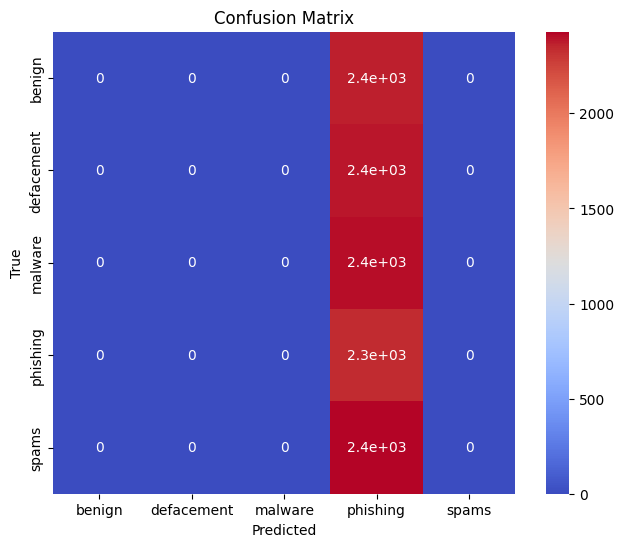

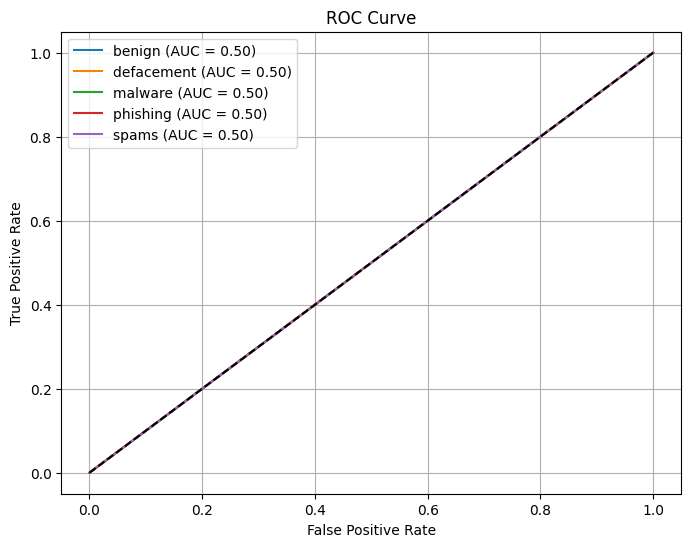

In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Use your trained model (e.g., XGBoost)
xgb_model = models['XGBoost']  

y_pred_proba = xgb_model.predict_proba(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='coolwarm', square=True, xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve for multi-class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(le.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(len(le.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'{le.classes_[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()
